### Load Packages

In [2]:
import cvxpy as cvx
import numpy as np
import pandas as pd
from IPython.display import display
import time
from datetime import datetime
import pytz  # timezone library

# Import Zipline functions
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol, set_benchmark

# import project_tests
# import project_helper

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (14, 8)


# Simple backtest

In [3]:
def initialize(context):
    
    # Which stock to trade
    context.stock = symbol('AAPL')
    
    # Moving average window
    context.index_average_window = 100
    
    # Benchmark
    context.benchmark_sid = symbol('SPY')
    
    
def handle_data(context, data):
    
    # Request history for the stock
    equities_hist = data.history(context.stock, 'close',
                                 context.index_average_window, '1d')
#     print(equities_hist)
    # Check if price is above moving average
    if equities_hist[-1] > equities_hist.mean():
        stock_weight = 1.0
    else:
        stock_weight = 0.0
    
    # Place order
    order_target_percent(context.stock, stock_weight)
    

def analyze(context, perf):
    fig = plt.figure(figsize = (12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.semilogy(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second Chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'],
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)
    
    # Third Chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Return', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)
    

In [4]:
# Set start and end date
start_date = pd.Timestamp('2015-1-1', tz='utc')
end_date = pd.Timestamp('2018-7-25', tz='utc')


# Fire off the backtest
results = run_algorithm(
    start=start_date,
    end=end_date, 
    initialize=initialize, 
    analyze=analyze,
    handle_data=handle_data,
    capital_base=10000,
    data_frequency='daily', bundle='daily-csvdir-bundle'
)


ValueError: SQLite file '/Users/leehongkai/.zipline/data/daily-csvdir-bundle/2020-08-15T05;21;40.266281/assets-7.sqlite' doesn't exist.

# Portfolio Backtest

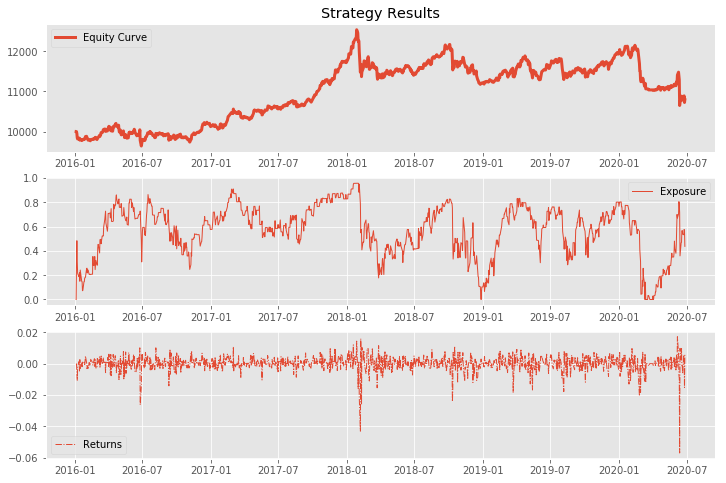

In [11]:
# This ensures that our graphs will be shown properly in the notebook.
%matplotlib inline

# Import a few libraries we need
from zipline import run_algorithm

from zipline.api import order_target_percent, record, symbol
from datetime import datetime
import pytz
import matplotlib.pyplot as plt
import pandas as pd

def initialize(context):
    # Which stock to trade
    dji = [
        "AAPL",
        "BA",
        "CAT",
        "CSCO",
        "CVX",
        "DIS",
#         "DWDP",
        "GS",
        "HD",
        "IBM",
        "INTC",
        "JNJ",
        "JPM",
        "KO",
        "MCD",
        "MMM",
        "MRK",
        "MSFT",
        "NKE",
        "PFE",
        "PG",
#         "TRV",
        "UNH",
#         "UTX",
        "V",
        "VZ",
        "WBA",
        "WMT",
        "XOM",  
    ]
    
    # Make a list of symbols from the list of tickers
    context.dji_symbols = [symbol(s) for s in dji]
    
    # Moving average window
    context.index_average_window = 100
    
    # Benchmark
    context.benchmark_sid = symbol('SPY')
    
def handle_data(context, data):
    # Get history for all the stocks
    stock_hist = data.history(context.dji_symbols, "close", context.index_average_window, "1d")
    
    # Make an empty DataFrame to start with
    stock_analytics = pd.DataFrame()
    
    # Add column for above or below average
    stock_analytics['is_above_mean'] = stock_hist.iloc[-1] > stock_hist.mean() 
    
    # Set weight for stocks to buy
    stock_analytics.loc[stock_analytics['is_above_mean'] == True, 'weight'] = 1/len(context.dji_symbols)
    
    # Set weight to zero for the rest
    stock_analytics.loc[stock_analytics['is_above_mean'] == False, 'weight'] = 0.0
    
    # Iterate each row and place trades
    for stock, analytics in stock_analytics.iterrows():
        # Check if the stock can be traded
        if data.can_trade(stock):
            # Place the trade
            order_target_percent(stock, analytics['weight'])

def analyze(context, perf):
    fig = plt.figure(figsize=(12, 8))
    
    # First chart
    ax = fig.add_subplot(311)
    ax.set_title('Strategy Results')
    ax.plot(perf['portfolio_value'], linestyle='-', 
                label='Equity Curve', linewidth=3.0)
    ax.legend()
    ax.grid(False)
    
    # Second chart
    ax = fig.add_subplot(312)
    ax.plot(perf['gross_leverage'], 
            label='Exposure', linestyle='-', linewidth=1.0)
    ax.legend()
    ax.grid(True)

    # Third chart
    ax = fig.add_subplot(313)
    ax.plot(perf['returns'], label='Returns', linestyle='-.', linewidth=1.0)
    ax.legend()
    ax.grid(True)

# Set start and end date
start_date = pd.Timestamp('2016-1-1', tz='utc')
end_date = pd.Timestamp('2020-6-25', tz='utc')

# Fire off the backtest
results = run_algorithm(start=start_date, 
                        end=end_date, 
                        initialize=initialize, 
                        analyze=analyze, 
                        handle_data=handle_data, 
                        capital_base=10000, 
                        data_frequency = 'daily', bundle='daily-csvdir-bundle') 


Start date,2016-01-04
End date,2020-07-24
Total months,54
,Backtest
Annual return,8.3%
Cumulative returns,43.7%
Annual volatility,20.2%
Sharpe ratio,0.50
Calmar ratio,0.26
Stability,0.77
Max drawdown,-31.5%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,31.48,2020-02-19,2020-03-23,NaT,NaN
1,19.53,2018-10-03,2018-12-24,2019-11-07,287
2,10.76,2016-04-01,2016-06-27,2016-12-01,175
3,10.35,2018-01-26,2018-02-08,2018-08-20,147
4,6.18,2016-01-04,2016-02-11,2016-03-04,45


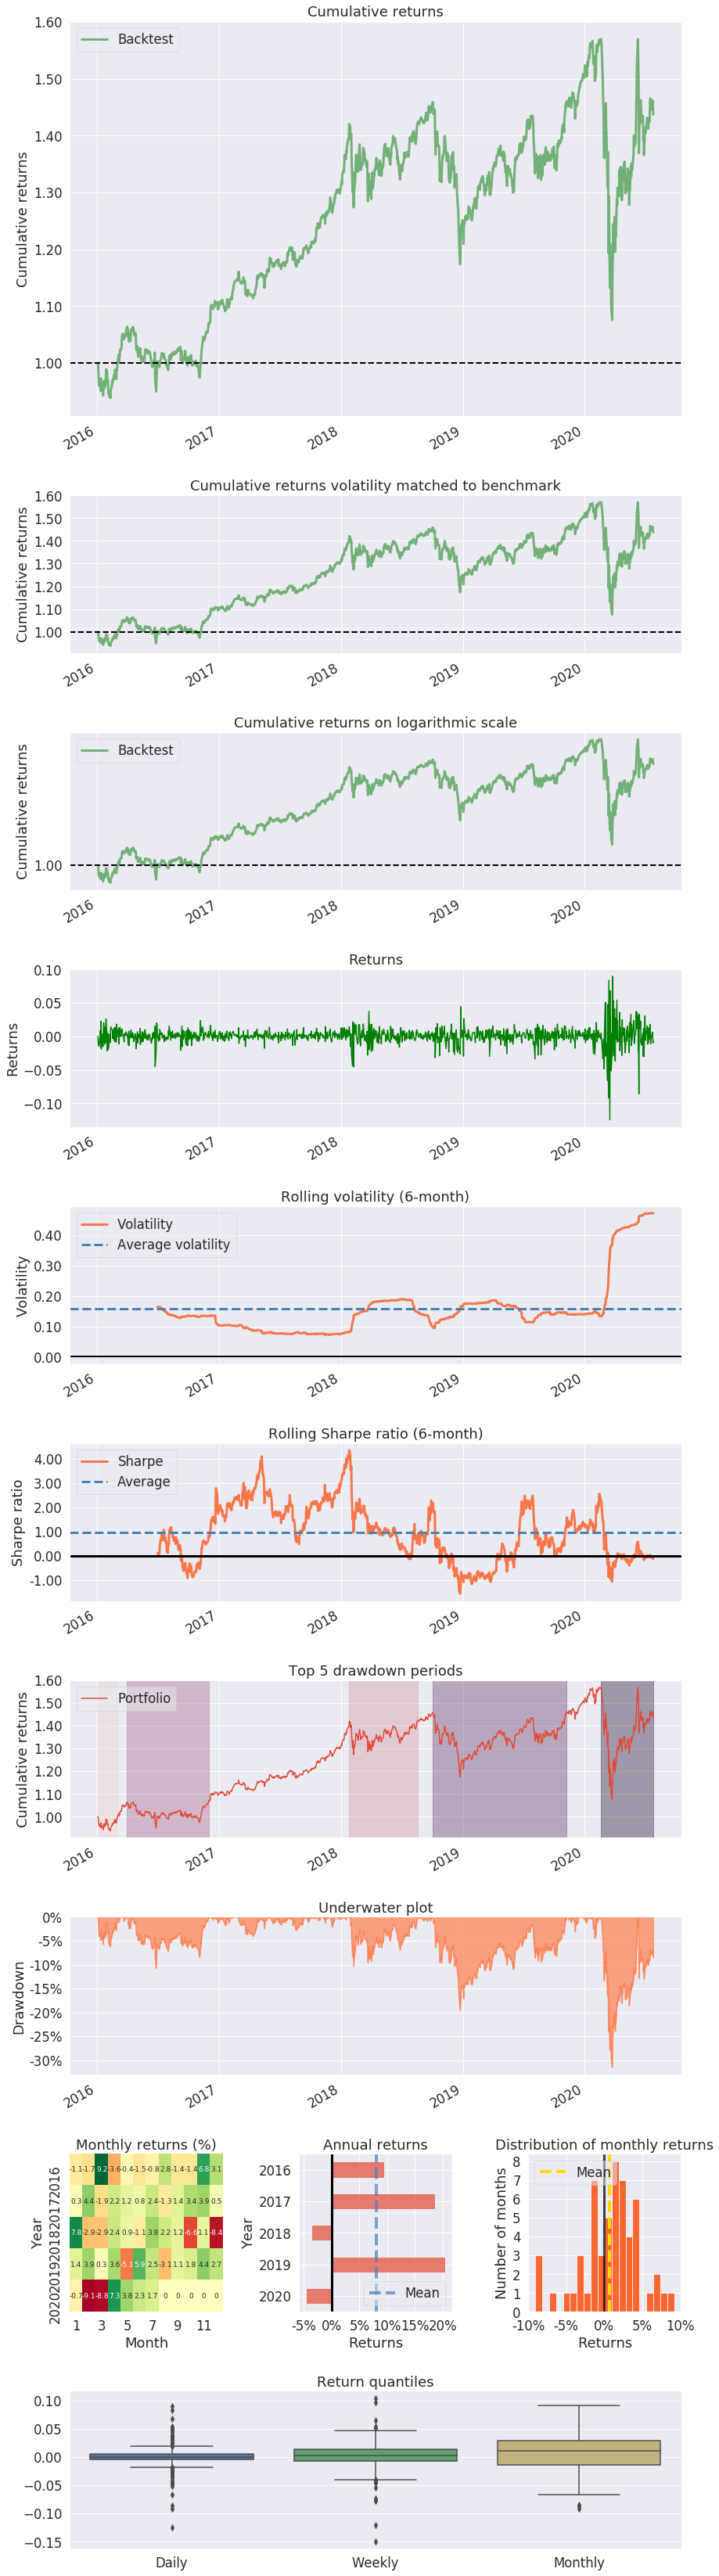

In [7]:
# Import a few libraries we need
%matplotlib inline
from zipline import run_algorithm
from zipline.api import order_target_percent, symbol,  \
    schedule_function, date_rules, time_rules
from datetime import datetime
import pytz
import pyfolio as pf

def initialize(context):
    # Which stocks to trade
    dji = [
        "AAPL",
        "AXP",
        "BA",
        "CAT",
        "CSCO",
        "CVX",
        "DIS",
#         "DWDP",
        "GS",
        "HD",
        "IBM",
        "INTC",
        "JNJ",
        "JPM",
        "KO",
        "MCD",
        "MMM",
        "MRK",
        "MSFT",
        "NKE",
        "PFE",
        "PG",
        "TRV",
        "UNH",
#         "UTX",
        "V",
        "VZ",
        "WBA",
        "WMT",
        "XOM",  
    ]
    
    # Make symbol list from tickers
    context.universe = [symbol(s) for s in dji]
    
    # History window
    context.history_window = 20
    
    # Size of our portfolio
    context.stocks_to_hold = 10
    
    # Schedule the daily trading routine for once per month
    schedule_function(handle_data, date_rules.month_start(), time_rules.market_close())    
    
def month_perf(ts):
    perf = (ts[-1] / ts[0]) - 1
    return perf
    
def handle_data(context, data):
    # Get history for all the stocks.
    hist = data.history(context.universe, "close", context.history_window, "1d")
    
    # This creates a table of percent returns, in order.
    perf_table = hist.apply(month_perf).sort_values(ascending=False)

    # Make buy list of the top N stocks
    buy_list = perf_table[:context.stocks_to_hold]
    
    # The rest will not be held.
    the_rest = perf_table[context.stocks_to_hold:]
    
    # Place target buy orders for top N stocks.
    for stock, perf in buy_list.iteritems():
        stock_weight = 1 / context.stocks_to_hold

        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, stock_weight)

    # Make sure we are flat the rest.
    for stock, perf in the_rest.iteritems():
        # Place order
        if data.can_trade(stock):
            order_target_percent(stock, 0.0)     
            
def analyze(context, perf):
    # Use PyFolio to generate a performance report
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    

# Set start and end date
start_date = pd.Timestamp('2016-1-1', tz='utc')
end_date = pd.Timestamp('2020-7-25', tz='utc')

# Fire off the backtest
result = run_algorithm(
    start=start_date, 
    end=end_date, 
    initialize=initialize, 
    analyze=analyze, 
    capital_base=10000, 
    data_frequency = 'daily', 
    bundle='daily-csvdir-bundle' 
)


In [12]:
result.loc['2016-02-05']

algo_volatility                                                     0.219101
algorithm_period_return                                           -0.0515802
alpha                                                               0.227488
benchmark_period_return                                            -0.078089
benchmark_volatility                                                0.227218
beta                                                                0.918395
capital_used                                                               0
ending_cash                                                          209.028
ending_exposure                                                      9275.17
ending_value                                                         9275.17
excess_return                                                              0
gross_leverage                                                       0.97796
long_exposure                                                        9275.17

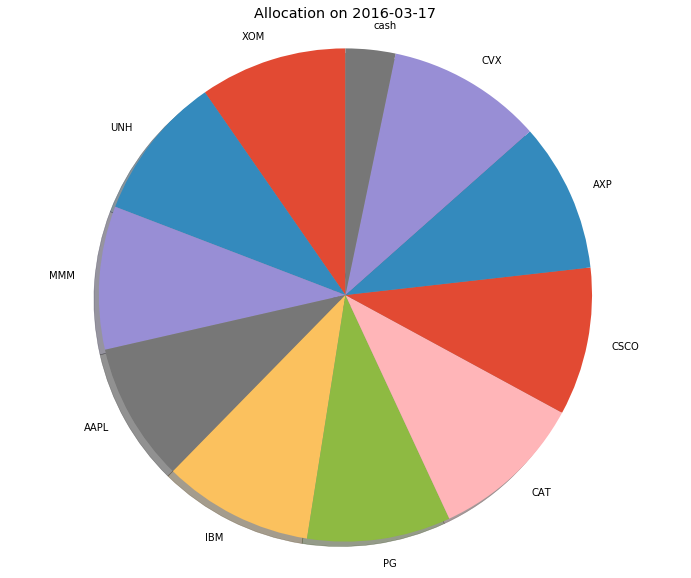

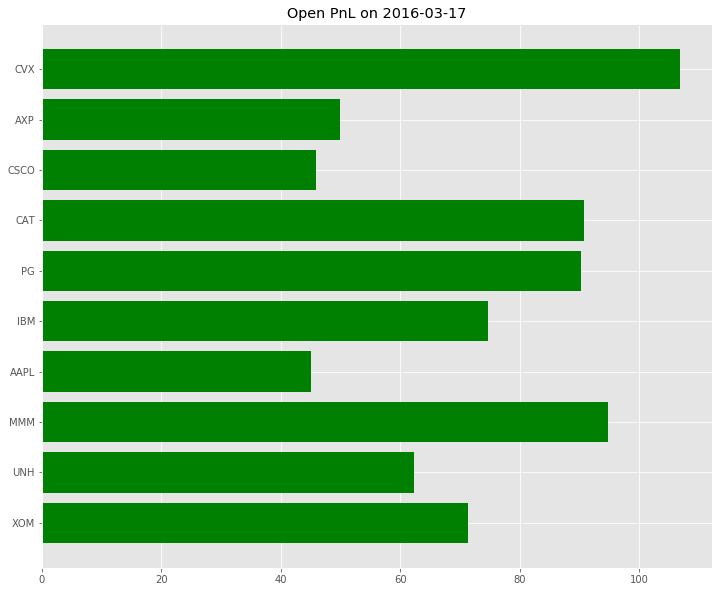

In [26]:
# select day to view
day = '2016-03-17'

# Get portfolio value and positions for this day
port_value = result.loc[day, 'portfolio_value']
day_positions = result.loc[day, 'positions']

# Empty DataFrame to store values
df = pd.DataFrame(columns=['value', 'pnl'])

# Populate DataFrame with position info
for pos in day_positions:
    ticker = pos['sid'].symbol
    df.loc[ticker, 'value'] = pos['amount'] * pos['last_sale_price']
    df.loc[ticker, 'pnl'] = df.loc[ticker, 'value'] - (pos['amount'] * pos['cost_basis'])
    
# Add cash position
df.loc['cash', ['value', 'pnl']] = [(port_value - df['value'].sum()), 0]

# Make pie chart for allocation
fig, ax1 = plt.subplots(figsize =[12, 10])
ax1.pie(df['value'], labels=df.index, shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Allocation on {}'.format(day))
plt.show()

# Make bar chart for open PnL
fig, ax1 = plt.subplots(figsize=[12, 10])
pnl_df = df.drop('cash')
ax1.barh(pnl_df.index, pnl_df['pnl'], align='center', color='green', ecolor='black')
ax1.set_title('Open PnL on {}'.format(day))
plt.show()

In [23]:
df

,value,pnl
XOM,1009.2,71.2793
UNH,996.24,62.3253
MMM,982.5,94.8304
AAPL,952.2,44.9876
IBM,1029.28,74.6959
PG,984.6,90.174
CAT,1062.6,90.7803
CSCO,1014.84,45.9198
AXP,1021.36,49.8175
CVX,1065.79,106.76


In [1]:
import quanp
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import quanp as qc

qc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
qc.logging.print_versions()
results_file = './write/test.h5ad'
qc.settings.set_figure_params(dpi=80, frameon=False, figsize=(3, 3), facecolor='white')  # low dpi (dots per inch) yields small inline figures

df_sp500 = qc.datasets.wiki_sp500_members_update('update_20200802.csv')


AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import quanp as qc

qc.datasets.get_wiki_sp500_metadata()

,Symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Headquarters Location,Date first added,CIK,Founded
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",1976-08-09,0000066740,1902
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",1964-03-31,0000001800,1888
2,ABBV,AbbVie Inc.,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,0001551152,2013 (1888)
3,ABMD,ABIOMED Inc,reports,Health Care,Health Care Equipment,"Danvers, Massachusetts",2018-05-31,0000815094,1981
4,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,0001467373,1989
5,ATVI,Activision Blizzard,reports,Communication Services,Interactive Home Entertainment,"Santa Monica, California",2015-08-31,0000718877,2008
6,ADBE,Adobe Inc.,reports,Information Technology,Application Software,"San Jose, California",1997-05-05,0000796343,1982
7,AMD,Advanced Micro Devices Inc,reports,Information Technology,Semiconductors,"Santa Clara, California",2017-03-20,0000002488,1969
8,AAP,Advance Auto Parts,reports,Consumer Discretionary,Automotive Retail,"Raleigh, North Carolina",2015-07-09,0001158449,1932
9,AES,AES Corp,reports,Utilities,Independent Power Producers & Energy Traders,"Arlington, Virginia",1998-10-02,0000874761,1981


# test 

In [1]:
import trading_calendars
# import sys
# !{sys.executable} -m pip install trading-calendars==1.11.10
trading_calendars.__version__

'1.11.10'

In [13]:
import alphalens as al
import graphviz
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from IPython.display import Image
from sklearn.tree import export_graphviz
from zipline.assets._assets import Equity  # Required for USEquityPricing
from zipline.pipeline.data import USEquityPricing
from zipline.pipeline.classifiers import Classifier
from zipline.pipeline.engine import SimplePipelineEngine
from zipline.pipeline.loaders import USEquityPricingLoader
from zipline.utils.numpy_utils import int64_dtype

# from zipline.pipeline.domain import GENERIC, US_EQUITIES, infer_domain, Domain


EOD_BUNDLE_NAME = 'daily-csvdir-bundle'


class PricingLoader(object):
    def __init__(self, bundle_data):
        self.loader = USEquityPricingLoader(
            bundle_data.equity_daily_bar_reader,
            bundle_data.adjustment_reader)

    def get_loader(self, column):
        if column not in USEquityPricing.columns:
            raise Exception('Column not in USEquityPricing')
        return self.loader


class Sector(Classifier):
    dtype = int64_dtype
    window_length = 0
    inputs = ()
    missing_value = -1

    def __init__(self):
        self.data = np.load('./data/project_7_sector/data.npy')

    def _compute(self, arrays, dates, assets, mask):
        return np.where(
            mask,
            self.data[assets],
            self.missing_value,
        )


def build_pipeline_engine(bundle_data, trading_calendar):
    pricing_loader = PricingLoader(bundle_data)

    engine = SimplePipelineEngine(
        get_loader=pricing_loader.get_loader,
        calendar=trading_calendar.all_sessions,
        asset_finder=bundle_data.asset_finder)

    return engine


def plot_tree_classifier(clf, feature_names=None):
    dot_data = export_graphviz(
        clf,
        out_file=None,
        feature_names=feature_names,
        filled=True,
        rounded=True,
        special_characters=True,
        rotate=True)

    return Image(graphviz.Source(dot_data).pipe(format='png'))


def plot(xs, ys, labels, title='', x_label='', y_label=''):
    for x, y, label in zip(xs, ys, labels):
        plt.ylim((0.5, 0.55))
        plt.plot(x, y, label=label)

    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend(bbox_to_anchor=(1.04, 1), borderaxespad=0)
    plt.show()


def rank_features_by_importance(importances, feature_names):
    indices = np.argsort(importances)[::-1]
    max_feature_name_length = max([len(feature) for feature in feature_names])

    print('      Feature{space: <{padding}}      Importance'.format(padding=max_feature_name_length - 8, space=' '))

    for x_train_i in range(len(importances)):
        print('{number:>2}. {feature: <{padding}} ({importance})'.format(
            number=x_train_i + 1,
            padding=max_feature_name_length,
            feature=feature_names[indices[x_train_i]],
            importance=importances[indices[x_train_i]]))


def sharpe_ratio(factor_returns, annualization_factor=np.sqrt(252)):
    return annualization_factor * factor_returns.mean() / factor_returns.std()


def get_factor_returns(factor_data):
    ls_factor_returns = pd.DataFrame()

    for factor, factor_data in factor_data.items():
        ls_factor_returns[factor] = al.performance.factor_returns(factor_data).iloc[:, 0]

    return ls_factor_returns


def plot_factor_returns(factor_returns):
    (1 + factor_returns).cumprod().plot(ylim=(0.8, 1.2))


def plot_factor_rank_autocorrelation(factor_data):
    ls_FRA = pd.DataFrame()

    unixt_factor_data = {
        factor: factor_data.set_index(pd.MultiIndex.from_tuples(
            [(x.timestamp(), y) for x, y in factor_data.index.values],
            names=['date', 'asset']))
        for factor, factor_data in factor_data.items()}

    for factor, factor_data in unixt_factor_data.items():
        ls_FRA[factor] = al.performance.factor_rank_autocorrelation(factor_data)

    ls_FRA.plot(title="Factor Rank Autocorrelation", ylim=(0.8, 1.0))


def build_factor_data(factor_data, pricing):
    return {factor_name: al.utils.get_clean_factor_and_forward_returns(factor=data, prices=pricing, periods=[1])
        for factor_name, data in factor_data.iteritems()}

In [14]:
import os
from zipline.data import bundles

# os.environ['ZIPLINE_ROOT'] = os.path.join(os.getcwd(), 'data', 'project_7_eod')
os.environ['ZIPLINE_ROOT'] = '/Users/leehongkai/.zipline'

ingest_func = bundles.csvdir.csvdir_equities(['daily'], EOD_BUNDLE_NAME)
bundles.register(EOD_BUNDLE_NAME, ingest_func)

print('Data Registered')

Data Registered


/Users/leehongkai/anaconda/envs/trading/lib/python3.5/site-packages/ipykernel_launcher.py:8: UserWarning: Overwriting bundle with name 'daily-csvdir-bundle'
  


In [15]:
os.environ['ZIPLINE_ROOT']

'/Users/leehongkai/.zipline'

In [16]:
from zipline.pipeline.pipeline import Pipeline
from zipline.pipeline.factors import AverageDollarVolume
from zipline.utils.calendars import get_calendar


universe = AverageDollarVolume(window_length=120).top(400) 
trading_calendar = get_calendar('NYSE') 
bundle_data = bundles.load(EOD_BUNDLE_NAME)
engine = build_pipeline_engine(bundle_data, trading_calendar)

In [17]:
import zipline
universe_end_date = pd.Timestamp('2020-08-05', tz='UTC')

universe_tickers = engine\
    .run_pipeline(
        Pipeline(screen=universe),
        universe_end_date,
        universe_end_date)\
    .index.get_level_values(1)\
    .values.tolist()
    
len(universe_tickers)

400

In [19]:
from zipline.data.data_portal import DataPortal


data_portal = DataPortal(
    bundle_data.asset_finder,
    trading_calendar=trading_calendar,
    first_trading_day=bundle_data.equity_daily_bar_reader.first_trading_day,
    equity_minute_reader=None,
    equity_daily_reader=bundle_data.equity_daily_bar_reader,
    adjustment_reader=bundle_data.adjustment_reader)

In [20]:
def get_pricing(data_portal, trading_calendar, assets, start_date, end_date, field='close'):
    end_dt = pd.Timestamp(end_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')
    start_dt = pd.Timestamp(start_date.strftime('%Y-%m-%d'), tz='UTC', offset='C')

    end_loc = trading_calendar.closes.index.get_loc(end_dt)
    start_loc = trading_calendar.closes.index.get_loc(start_dt)

    return data_portal.get_history_window(
        assets=assets,
        end_dt=end_dt,
        bar_count=end_loc - start_loc,
        frequency='1d',
        field=field,
        data_frequency='daily')

In [22]:
from zipline.pipeline.factors import CustomFactor, DailyReturns, Returns, SimpleMovingAverage, AnnualizedVolatility
from zipline.pipeline.data import USEquityPricing


factor_start_date = universe_end_date - pd.DateOffset(years=3, days=2)
sector = Sector()

def momentum_1yr(window_length, universe, sector):
    return Returns(window_length=window_length, mask=universe) \
        .demean(groupby=sector) \
        .rank() \
        .zscore()

def mean_reversion_5day_sector_neutral_smoothed(window_length, universe, sector):
    unsmoothed_factor = -Returns(window_length=window_length, mask=universe) \
        .demean(groupby=sector) \
        .rank() \
        .zscore()
    return SimpleMovingAverage(inputs=[unsmoothed_factor], window_length=window_length) \
        .rank() \
        .zscore()

class CTO(Returns):
    """
    Computes the overnight return, per hypothesis from
    https://papers.ssrn.com/sol3/papers.cfm?abstract_id=2554010
    """
    inputs = [USEquityPricing.open, USEquityPricing.close]
    
    def compute(self, today, assets, out, opens, closes):
        """
        The opens and closes matrix is 2 rows x N assets, with the most recent at the bottom.
        As such, opens[-1] is the most recent open, and closes[0] is the earlier close
        """
        out[:] = (opens[-1] - closes[0]) / closes[0]
        
class TrailingOvernightReturns(Returns):
    """
    Sum of trailing 1m O/N returns
    """
    window_safe = True
    
    def compute(self, today, asset_ids, out, cto):
        out[:] = np.nansum(cto, axis=0)

def overnight_sentiment_smoothed(cto_window_length, trail_overnight_returns_window_length, universe):
    cto_out = CTO(mask=universe, window_length=cto_window_length)
    unsmoothed_factor = TrailingOvernightReturns(inputs=[cto_out], window_length=trail_overnight_returns_window_length) \
        .rank() \
        .zscore()
    return SimpleMovingAverage(inputs=[unsmoothed_factor], window_length=trail_overnight_returns_window_length) \
        .rank() \
        .zscore()

NameError: name 'project_helper' is not defined

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
from matplotlib import rcParams
import quanp as qc

df = qc.datasets.get_wiki_sp500_metadata()

df['GICS Sector'].value_counts()

TypeError: argument should be string, bytes or integer, not PosixPath

In [5]:
df['GICS Sub Industry'].value_counts()

Health Care Equipment                         20
Industrial Machinery                          14
Semiconductors                                13
Electric Utilities                            13
Packaged Foods & Meats                        12
Application Software                          12
Aerospace & Defense                           11
Multi-Utilities                               11
Regional Banks                                11
Data Processing & Outsourced Services         11
Oil & Gas Exploration & Production            11
Apparel, Accessories & Luxury Goods            9
Specialized REITs                              9
Building Products                              8
Specialty Chemicals                            8
Pharmaceuticals                                8
Asset Management & Custody Banks               8
Financial Exchanges & Data                     8
Property & Casualty Insurance                  8
Technology Hardware, Storage & Peripherals     7
Biotechnology       